In [1]:
!pip install replicate pandas --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.0 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd
from google.colab import files
import replicate
from tqdm import tqdm


In [3]:
# Token API
os.environ["REPLICATE_API_TOKEN"] = #"TOKEN"

In [4]:
# Upload Dataset
uploaded = files.upload()

Saving cleaned_reviews.csv to cleaned_reviews.csv


In [5]:
# Load dataset
df = pd.read_csv("cleaned_reviews.csv")

review_column = "Customer Review"

In [6]:
def run_llm(prompt, target_field=None):
    try:
        output = replicate.run(
            "ibm-granite/granite-3.3-8b-instruct",
            input={"prompt": prompt,
                   "temperature": 0.3,
                   "top_p": 0.9,
                   "max_new_tokens": 200}
        )
        result = "".join(output).strip()
        return result
    except Exception as e:
        return f"❌ Error: {e}"

In [7]:
# Functions for Each Analysis
def summary_review(teks):
    return run_llm(f'Ringkas menjadi kalimat pendek dalam bahasa indonesia.\n"{teks}"')

def review_sentiment(teks):
    return run_llm(f'Apa sentimen ulasan ini? Jawab dengan 1 kata saja seperti: Positif, Negatif, atau Netral.\n"{teks}"')

def emotional_reviews(teks):
    return run_llm(f'Apa emosi utama dari ulasan ini? Jawab dengan 1 kata seperti: Senang, Kecewa, Puas, Marah, Netral.\n"{teks}"')

def complaint_detection(teks):
    return run_llm(f'Apakah ulasan ini mengandung keluhan? Jawab dengan 1 kata saja seperti: Ya, Tidak\n"{teks}"')

def seller_suggestion(teks):
    return run_llm(f'Beri saran singkat untuk seller berdasarkan ulasan ini\n"{teks}"Jawab dengan 1 kalimat saja dalam bahasa indonesia yang profesional dan mudah dipahami.')


In [8]:
# Run Analysis
results = []
data = 5
for i, teks in tqdm(enumerate(df[review_column].dropna().head(data)), total=data):
    results.append({
        "No": i+1,
        "Customer Review": teks,
        "Ringkasan": summary_review(teks),
        "Sentimen": review_sentiment(teks),
        "Emosi": emotional_reviews(teks),
        "Keluhan": complaint_detection(teks),
        "Saran": seller_suggestion(teks),
    })
results_df = pd.DataFrame(results)
results_df

100%|██████████| 5/5 [00:08<00:00,  1.66s/it]


,No,Customer Review,Ringkasan,Sentimen,Emosi,Keluhan,Saran
0,1,Alhamdulillah berfungsi dengan baik. Packaging...,"""Alhamdulillah, fungsi baik. Pakaiannya aman. ...",Positif,Senang,Tidak,Seller diharapkan terus berkomitmen terhadap p...
1,2,"barang bagus dan respon cepat, harga bersaing ...","Barang berkualitas, jawaban cepat, harga kompe...",Positif,Senang,Tidak,"Seller, terima kasih atas ulasan positif. Teta..."
2,3,"barang bagus, berfungsi dengan baik, seler ram...","Barang berkualitas, bekerja dengan baik, ramah...",Positif,Senang,Tidak,"Seller, terima kasih atas umpan balik positif...."
3,4,bagus sesuai harapan penjual nya juga ramah. t...,"""Produk bagus, sesuai harapan penjual, ramah j...",Positif,Senang,Tidak,Terima kasih atas pengalaman positif dan saran...
4,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...","""Barang Bagus & Aman, Beroperasional Lancar""",Positif,Puas,Tidak,Seller harus terus memperhatikan kualitas peng...


In [9]:
# Run Analysis For All Data
review_results = []

for i, teks in tqdm(enumerate(df[review_column].dropna()), total=len(df[review_column].dropna())):
    review_results.append({
        "No": i+1,
        "Customer Review": teks,
        "Ringkasan": summary_review(teks),
        "Sentimen": review_sentiment(teks),
        "Emosi": emotional_reviews(teks),
        "Keluhan": complaint_detection(teks),
        "Saran": seller_suggestion(teks),
    })
review_results_df = pd.DataFrame(review_results)
review_results_df

100%|██████████| 200/200 [05:20<00:00,  1.60s/it]


,No,Customer Review,Ringkasan,Sentimen,Emosi,Keluhan,Saran
0,1,Alhamdulillah berfungsi dengan baik. Packaging...,"""Alhamdulillah, fungsi baik. Pakaiannya aman. ...",Positif,Senang,Tidak,Seller diharapkan untuk terus memperjuangkan k...
1,2,"barang bagus dan respon cepat, harga bersaing ...","Barang berkualitas, jawaban cepat, harga kompe...",Positif,Senang,Tidak,"Seller, terima kasih atas ulasan positif. Teta..."
2,3,"barang bagus, berfungsi dengan baik, seler ram...","Barang berkualitas, bekerja dengan baik, ramah...",Positif,Senang,Tidak,"Seller, terima kasih atas ulasan positif. Sele..."
3,4,bagus sesuai harapan penjual nya juga ramah. t...,"""Produk bagus sesuai harapan, penjual juga ram...",Positif,Senang,Tidak,"Terima kasih atas umpan balik positif, saya sa..."
4,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...","""Barang Bagus & Selamat, Bisa Beroperasional L...",Positif,Puas,Tidak,Seller harus terus berkomitmen untuk menjaga k...
...,...,...,...,...,...,...,...
195,196,Sangat kecewa sekali. Produk kakinya goyang ti...,"Sangat kecewa, produk tidak sesuai dengan foto...",Negatif,Marah,Ya,Seller harus mengevaluasi kualitas kontrol pro...
196,197,"baru pake 3 hari udh berulah, susah hidup, kad...","Baru 3 hari, sudah rusak, sulit hidup, kadang-...",Negatif,Marah,Ya,Seller diharaskan karena produk baru rusak dal...
197,198,RAMnya gabisa di pakai walau udh minta tuker 2...,"""RAM gagal digunakan meskipun sudah diminta tu...",Negatif,Marah,Ya,Seller dianjurkan untuk mengevaluasi dan mengg...
198,199,Suara kecil sebelah.. ini produk bermasalah ka...,"""Suara kecil, produk bermasalah keuatan. Tidak...",Negatif,Marah,Ya,Seller harus mengevaluasi kualitas kontrol pro...


In [10]:
# Simpan file
review_results_df.to_csv("Hasil_Analisis.csv", index=False)
print("File disimpan sebagai Hasil_Analisis.csv")
# Download file
from google.colab import files
files.download("Hasil_Analisis.csv")

File disimpan sebagai Hasil_Analisis.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Sentiment label normalization
def clear_sentiment(s):
    s = s.lower()
    if "positif" in s:
        return "Positif"
    elif "negatif" in s:
        return "Negatif"
    elif "netral" in s:
        return "Netral"
    else:
        return "Lainnya"

review_results_df['Sentimen'] = review_results_df['Sentimen'].apply(clear_sentiment)


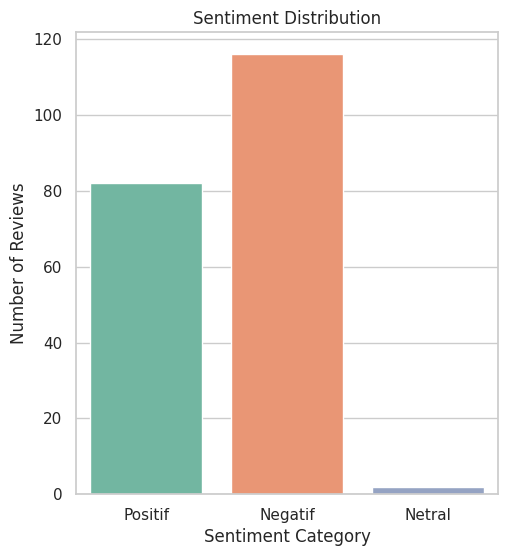

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# Plot Sentiment Distribution
plt.subplot(1,2,1)
sns.countplot(x='Sentimen', hue='Sentimen', data=review_results_df, palette='Set2', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

In [13]:
# Normalizing emotional labels
def clear_emotional(s):
    s = s.lower()
    if "senang" in s:
        return "Senang"
    elif "kecewa" in s:
        return "Kecewa"
    elif "puas" in s:
        return "Puas"
    elif "marah" in s:
        return "Marah"
    elif "netral" in s:
        return "Netral"
    else:
        return "Lainnya"

review_results_df['Emosi'] = review_results_df['Emosi'].apply(clear_emotional)

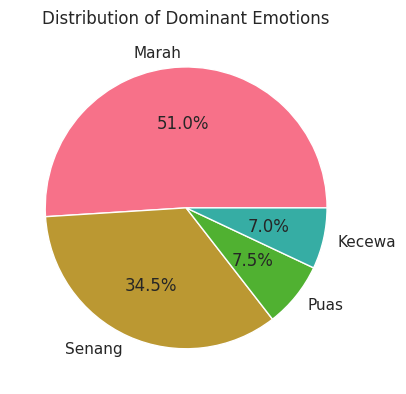

In [14]:
# Count the Number
emosi_count = review_results_df['Emosi'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(10,12))
plt.subplot(1,2,2)
plt.pie(emosi_count, labels=emosi_count.index, autopct='%1.1f%%', colors=sns.color_palette('husl'))
plt.title('Distribution of Dominant Emotions')
plt.show()

In [15]:
# Normalizing complaint labels
def clear_complaints(s):
    s = s.lower()
    if "ya" in s:
        return "Ya"
    elif "tidak" in s:
        return "Tidak"
    else:
        return "Lainnya"

review_results_df['Keluhan'] = review_results_df['Keluhan'].apply(clear_complaints)

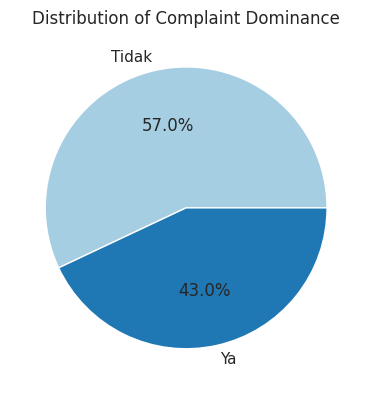

In [16]:
# Count the Number
complaint_count = review_results_df['Keluhan'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(10,12))
plt.subplot(1,2,2)
plt.pie(complaint_count, labels=complaint_count.index, autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('Distribution of Complaint Dominance')
plt.show()